In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

#genre_df = Spotify Dataset 1921-2020, 160k+ Tracks


genre_df = pd.read_csv("../Datasets/data_by_genres.csv")
genre_df

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,zolo,0.218600,0.560365,2.675453e+05,0.611985,0.152665,0.190792,-11.499268,0.064295,123.283566,0.596705,33.760410,9,1
2660,zouglou,0.124000,0.834000,2.951470e+05,0.674000,0.000000,0.082800,-13.455000,0.072100,119.039000,0.951000,56.000000,7,0
2661,zouk,0.233181,0.752762,2.951100e+05,0.627238,0.301195,0.083224,-10.864476,0.038110,101.681762,0.844381,42.476190,4,1
2662,zouk riddim,0.052700,0.776000,2.293330e+05,0.656000,0.565000,0.044500,-14.316000,0.034100,99.981000,0.966000,24.000000,4,1


In [3]:
genre_df["genres"].unique()

array(['432hz', '[]', 'a cappella', ..., 'zouk', 'zouk riddim', 'zydeco'],
      dtype=object)

count    2664.000000
mean       40.119079
std        16.018515
min         0.000000
25%        33.000000
50%        43.000000
75%        50.879969
max        82.000000
Name: popularity, dtype: float64

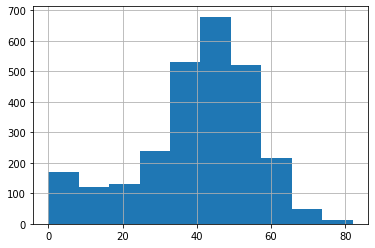

In [4]:
genre_df["popularity"].hist()
genre_df["popularity"].describe()

In [5]:
#Demostrar el grado de valence en los Top 100 de géneros populares

genres_popularity=genre_df[["genres","popularity","valence"]]
genres_popularity=genres_popularity.sort_values(by="popularity", ascending=False)
genres_popularity.head(100)

,genres,popularity,valence
512,circuit,82.000000,0.556000
1118,guaracha,82.000000,0.556000
2141,russian dance,79.000000,0.326000
34,afroswing,77.625000,0.701125
2104,ritmo kombina,77.333333,0.505333
...,...,...,...
1419,k-pop girl group,63.675769,0.674597
2511,uk hip hop,63.544762,0.528890
2377,swedish tropical house,63.500000,0.223500
2384,swiss pop,63.500000,0.492500


In [6]:
genres_energy=genre_df[["genres","energy","danceability","loudness","popularity","valence"]]
genres_energy=genres_energy.sort_values(by="energy", ascending=False)
genres_energy.head(100)

,genres,energy,danceability,loudness,popularity,valence
1799,norwegian death metal,0.999500,0.204000,-5.127500,41.000000,0.027850
251,black 'n' roll,0.999500,0.204000,-5.127500,41.000000,0.027850
255,blackened crust,0.999500,0.204000,-5.127500,41.000000,0.027850
156,australian ska,0.994667,0.312667,-4.356000,44.333333,0.228900
2423,tennessee metal,0.994333,0.372000,-4.621000,46.000000,0.105967
...,...,...,...,...,...,...
1537,manchester indie,0.920000,0.402000,-2.944000,44.000000,0.297000
1849,okinawan pop,0.919500,0.481000,-3.761000,59.250000,0.633500
1504,liverpool indie,0.919000,0.429071,-5.046714,52.285714,0.574571
865,easycore,0.918714,0.549819,-3.988851,46.206494,0.565258


In [7]:
genres_energy["genres"][100]

'argentine hip hop'

In [8]:
genre = []
valence = 0
popularity = 0
loudness = 0
danceability = 0
energy = 0
valences = []
popularities = []
loudnesses = []
danceabilities = []
energies = []
countries =["mexican", "australian", "argentine", "colombian", "chile", "japan", "chinese", "spanish", "canadian",
            "american", "french", "german", "russia", "indonesian", "indian", "south african", "nigerian",
           "belgian", "brazil", "british", "czech", "danish", "dutch", "greek", "icelandic", "israeli"]

mexican_genres=[]
australian_genres=[]
argentine_genres=[]
colombian_genres=[]
chile_genres=[]
japan_genres=[]
chinese_genres=[]
spanish_genres=[]
canadian_genres=[]
american_genres=[]
french_genres=[]
german_genres=[]
russia_genres=[]
indonesian_genres=[]
indian_genres=[]
south_african_genres=[]
nigerian_genres=[]
belgian_genres=[]
brazil_genres=[]
british_genres=[]
czech_genres=[]
danish_genres=[]
dutch_genres=[]
greek_genres=[]
icelandic_genres=[]
israeli_genres=[]  

for country in countries:
    for i in range(len(genres_energy["genres"])):           
        genre.append(genres_energy["genres"][i])
        valence += genres_energy["valence"][i]
        popularity += genres_energy["popularity"][i]
        loudness += genres_energy["loudness"][i]
        danceability += genres_energy["danceability"][i]
        energy += genres_energy["energy"][i]
    popularities.append(popularity/len(genre))
    valences.append(valence/len(genre))
    loudnesses.append(loudness/len(genre))
    danceabilities.append(danceability/len(genre))
    energies.append(energy/len(genre))


for i in range(len(genres_energy["genres"])):
    if "mexican" in genres_energy["genres"][i]:
        mexican_genres.append(genres_energy["genres"][i])
    elif "australian" in genres_energy["genres"][i]:
        australian_genres.append(genres_energy["genres"][i])
    elif "argentine" in genres_energy["genres"][i]:
        argentine_genres.append(genres_energy["genres"][i])
    elif "colombian" in genres_energy["genres"][i]:
        colombian_genres.append(genres_energy["genres"][i])
    elif "chile" in genres_energy["genres"][i]:
        chile_genres.append(genres_energy["genres"][i])
    elif "japan" in genres_energy["genres"][i]:
        japan_genres.append(genres_energy["genres"][i])
    elif "chinese" in genres_energy["genres"][i]:
        chinese_genres.append(genres_energy["genres"][i])
    elif "spanish" in genres_energy["genres"][i]:
        spanish_genres.append(genres_energy["genres"][i])
    elif "canadian" in genres_energy["genres"][i]:
        canadian_genres.append(genres_energy["genres"][i])
    elif "american" in genres_energy["genres"][i]:
        american_genres.append(genres_energy["genres"][i])
    elif "french" in genres_energy["genres"][i]:
        french_genres.append(genres_energy["genres"][i])
    elif "german" in genres_energy["genres"][i]:
        german_genres.append(genres_energy["genres"][i])
    elif "russia" in genres_energy["genres"][i]:
        russia_genres.append(genres_energy["genres"][i])
    elif "indonesian" in genres_energy["genres"][i]:
        indonesian_genres.append(genres_energy["genres"][i])
    elif "indian" in genres_energy["genres"][i]:
        indian_genres.append(genres_energy["genres"][i])
    elif "south african" in genres_energy["genres"][i]:
        south_african_genres.append(genres_energy["genres"][i])
    elif "nigerian" in genres_energy["genres"][i]:
        nigerian_genres.append(genres_energy["genres"][i])
    elif "belgian" in genres_energy["genres"][i]:
        belgian_genres.append(genres_energy["genres"][i])
    elif "brazil" in genres_energy["genres"][i]:
        brazil_genres.append(genres_energy["genres"][i])
    elif "british" in genres_energy["genres"][i]:
        british_genres.append(genres_energy["genres"][i])
    elif "czech" in genres_energy["genres"][i]:
        czech_genres.append(genres_energy["genres"][i])
    elif "danish" in genres_energy["genres"][i]:
        danish_genres.append(genres_energy["genres"][i])
    elif "dutch" in genres_energy["genres"][i]:
        dutch_genres.append(genres_energy["genres"][i])
    elif "greek" in genres_energy["genres"][i]:
        greek_genres.append(genres_energy["genres"][i])
    elif "icelandic" in genres_energy["genres"][i]:
        icelandic_genres.append(genres_energy["genres"][i])
    elif "israeli" in genres_energy["genres"][i]:
        israeli_genres.append(genres_energy["genres"][i])


In [9]:
# israeli_genres_df

NameError: name 'israeli_genres_df' is not defined

In [ ]:
mexican_genres
mexican_genres_df=[]

for i in range(len(mexican_genres)):
    a=genres_energy.loc[genres_energy["genres"]==mexican_genres[i]]
    mexican_genres_df.append(a)

In [ ]:
for i in range(len(countries)):
    print(f'{countries[i]}_genres_df=genres_energy.loc[genres_energy["genres"].isin({countries[i]}_genres)]')

In [ ]:
mexican_genres_df=genres_energy.loc[genres_energy["genres"].isin(mexican_genres)]
australian_genres_df=genres_energy.loc[genres_energy["genres"].isin(australian_genres)]
argentine_genres_df=genres_energy.loc[genres_energy["genres"].isin(argentine_genres)]
colombian_genres_df=genres_energy.loc[genres_energy["genres"].isin(colombian_genres)]
chile_genres_df=genres_energy.loc[genres_energy["genres"].isin(chile_genres)]
japan_genres_df=genres_energy.loc[genres_energy["genres"].isin(japan_genres)]
chinese_genres_df=genres_energy.loc[genres_energy["genres"].isin(chinese_genres)]
spanish_genres_df=genres_energy.loc[genres_energy["genres"].isin(spanish_genres)]
canadian_genres_df=genres_energy.loc[genres_energy["genres"].isin(canadian_genres)]
american_genres_df=genres_energy.loc[genres_energy["genres"].isin(american_genres)]
french_genres_df=genres_energy.loc[genres_energy["genres"].isin(french_genres)]
german_genres_df=genres_energy.loc[genres_energy["genres"].isin(german_genres)]
russia_genres_df=genres_energy.loc[genres_energy["genres"].isin(russia_genres)]
indonesian_genres_df=genres_energy.loc[genres_energy["genres"].isin(indonesian_genres)]
indian_genres_df=genres_energy.loc[genres_energy["genres"].isin(indian_genres)]
south_african_genres_df=genres_energy.loc[genres_energy["genres"].isin(south_african_genres)]
nigerian_genres_df=genres_energy.loc[genres_energy["genres"].isin(nigerian_genres)]
belgian_genres_df=genres_energy.loc[genres_energy["genres"].isin(belgian_genres)]
brazil_genres_df=genres_energy.loc[genres_energy["genres"].isin(brazil_genres)]
british_genres_df=genres_energy.loc[genres_energy["genres"].isin(british_genres)]
czech_genres_df=genres_energy.loc[genres_energy["genres"].isin(czech_genres)]
danish_genres_df=genres_energy.loc[genres_energy["genres"].isin(danish_genres)]
dutch_genres_df=genres_energy.loc[genres_energy["genres"].isin(dutch_genres)]
greek_genres_df=genres_energy.loc[genres_energy["genres"].isin(greek_genres)]
icelandic_genres_df=genres_energy.loc[genres_energy["genres"].isin(icelandic_genres)]
israeli_genres_df=genres_energy.loc[genres_energy["genres"].isin(israeli_genres)]

In [ ]:
mexican_genres_df["valence"].mean()

In [ ]:
plt.boxplot(mexican_genres_df["valence"])

In [15]:
mexican_genres_df=genres_energy.loc[genres_energy['genres'].isin(mexican_genres)]
mexican_genres_df.loc[mexican_genres_df["popularity"]>50]

,genres,energy,danceability,loudness,popularity,valence
2226,ska mexicano,0.805080,0.585433,-6.819666,54.045781,0.680987
1594,mexican pop punk,0.734000,0.568000,-4.108000,62.000000,0.642000
1595,mexican rock,0.727802,0.589251,-7.367966,54.364776,0.606758
2119,rock urbano mexicano,0.699530,0.510962,-8.526669,50.164890,0.499025
1591,mexican hip hop,0.670791,0.774897,-5.880503,51.669622,0.657584
2094,regional mexican pop,0.646763,0.706974,-5.508041,56.573375,0.816226
1592,mexican indie,0.632284,0.653791,-8.012294,60.928704,0.545994
1593,mexican pop,0.608410,0.644865,-7.738077,55.387746,0.543249
400,cancion infantil mexicana,0.299800,0.497600,-13.181600,57.600000,0.436760


In [ ]:
genres_energy.loc[genres_energy["genres"]==mexican_genres[0]]

In [ ]:
for x in range(len(countries)):
    print(f'elif "{countries[x]}" in genres_energy["genres"][i]:')
    print(f'{countries[x]}_genres.append(genres_energy["genres"][i])')

In [ ]:
for x in range(len(countries)):
    print(f'{countries[x]}_genres.append(["genres"][i])')

In [ ]:
countries_df = pd.DataFrame({"Country": countries, "Valence": valences, "Popularity": popularities, "Loudness": loudnesses,
                            "Danceability": danceabilities, "Energy": energies})
countries_df

In [ ]:
countries_df.describe()

In [ ]:
def barPlot(y_axis,x_axis,name):
    x = np.arange(len(countries_df["Country"]))
    plt.figure(figsize=(9,5))
    plt.bar(x_axis, y_axis)
    plt.xticks(x, x_axis, rotation = "vertical")
    plt.title(name + " per country")
    plt.xlabel("Countries")
    plt.ylabel(name)
    if name == "Valence":
        plt.hlines(0.536645,0,25, alpha = 0.5, color = "red")
        plt.annotate("Third quartile as valence threshold 0.536645",(10,0.55),fontsize=10,color="red")
    elif name == "Popularity":
        plt.hlines(44.960150,0,25, alpha = 0.5, color = "red")
        plt.annotate("Third quartile as popularity threshold 44.960150",(10,46),fontsize=10,color="red")
    elif name == "Loudness":
        plt.hlines(-9.535179,0,25, alpha = 0.5, color = "red")
        plt.annotate("Third quartile as popularity threshold -9.535179",(-1,-10.5),fontsize=10,color="red")
    elif name == "Danceability":
        plt.hlines(0.552568,0,25, alpha = 0.5, color = "red")
        plt.annotate("Third quartile as Danceability threshold 0.552568",(10,0.57),fontsize=10,color="red")
    elif name == "Energy":
        plt.hlines(0.596676,0,25, alpha = 0.5, color = "red")
        plt.annotate("Third quartile as Energy threshold 0.596676",(10,0.61),fontsize=10,color="red")
    plt.show()

In [ ]:
barPlot(countries_df["Valence"],countries_df["Country"],"Valence")

In [ ]:
barPlot(countries_df["Popularity"],countries_df["Country"],"Popularity")

In [ ]:
barPlot(countries_df["Loudness"],countries_df["Country"],"Loudness")

In [ ]:
barPlot(countries_df["Danceability"],countries_df["Country"],"Danceability")

In [ ]:
barPlot(countries_df["Energy"],countries_df["Country"],"Energy")

In [ ]:
#Understand df metadata 

genres_energy.describe()

In [ ]:
#Scatterplot to see relationships

valence_vs_energy = genres_energy.plot.scatter(x='energy',
                      y='valence',
                      c='Blue',
                          grid=True)


plt.title("Valence vs Energy")
plt.xlabel("Energy")
plt.ylabel("Valence")

#If considering valence's third quartile (0.63) as the treshold to define which music is happy, 

In [ ]:
valence_vs_energy = genres_energy.plot.scatter(x='danceability',
                      y='valence',
                      c='Blue',
                          grid=True)


plt.title("Valence vs Danceability")
plt.xlabel("Danceability")
plt.ylabel("Valence")

In [ ]:
  # Take a copy of the dataframe to modify
    new_df = genres_energy

    # generate two new lists to store the new multi-index
    Family_ID = []
    Family_Index = []

    # iterate through the IDs, split and allocate the pieces to the appropriate list
    for i in new_df[col_to_split]:

        i = i.split(sep)

        Family_ID.append(i[0])

        if len(i)==1:
            Family_Index.append("000")
        else: 
            Family_Index.append(i[1])

    # Modify and return the dataframe including the new multi-index
    return new_df.assign(Family_ID = Family_ID,
                         Family_Index = Family_Index)